## **Statistical Graphs using Python**

Importing Libraries

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Loading Data

In [23]:

conn = sqlite3.connect('/content/dinofunworld-1.db')
c=conn.cursor()

Pie Chart depicting visits to thrill ride attractions.



In [65]:
c.execute("SELECT a.Name, count(c.visitorID) \
FROM attraction as a \
join \
checkin as c \
on a.AttractionID=c.attraction \
WHERE a.category like '%thrill%' \
GROUP BY a.Name \
ORDER by count(c.visitorID)")

In [66]:
counts = c.fetchall()
Thrill_ride_visit = pd.DataFrame.from_records(counts, columns=['Ride','Visits'])

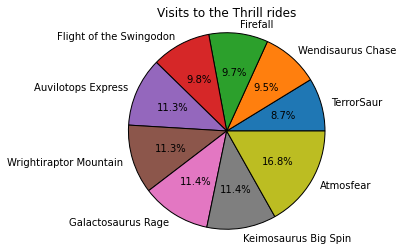

In [67]:
plt.pie(Thrill_ride_visit['Visits'],labels=Thrill_ride_visit['Ride'], shadow=False,wedgeprops={'edgecolor':'black'},textprops={'color':'black'},autopct='%1.1f%%')
plt.axis('equal')
plt.rcParams['font.size']=10
plt.title('Visits to the Thrill rides',fontdict={'color':'black'})
plt.show()

A Bar Chart depicting total visits to food stalls.

In [68]:
c.execute("SELECT a.Name, count(c.visitorID) \
FROM attraction as a \
join \
checkin as c \
on a.AttractionID=c.attraction \
WHERE a.category like '%food%' \
GROUP BY a.Name \
ORDER by count(c.visitorID)")


In [69]:
visits = c.fetchall()
food_stall_visits = pd.DataFrame.from_records(visits, columns=['Food stall','visits'])

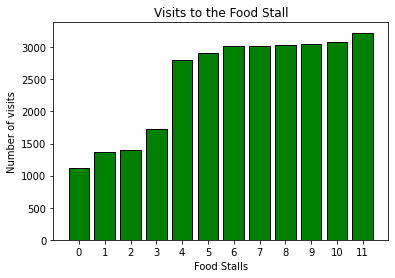

In [70]:
plt.bar(range(len(food_stall_visits['Food stall'])), food_stall_visits['visits'], color=['green'], edgecolor=['black'])
plt.xticks([x for x in range(len(food_stall_visits['Food stall']))])
plt.xlabel('Food Stalls')
plt.ylabel('Number of visits')
plt.title('Visits to the Food Stall')
plt.show()

A Line Chart depicting attendance at the newest ride, Atmosfear over the course of the day.

In [71]:
c.execute("SELECT AttractionID, Name \
FROM attraction \
WHERE Name='Atmosfear';")
attraction_param = c.fetchone()[0]

In [73]:
c.execute("SELECT visitorID, sequence \
FROM sequences \
WHERE sequence LIKE '%"+ str(attraction_param)+"%';")
sequence_param = c.fetchall()

In [74]:
sequence_stats = pd.DataFrame.from_records(sequence_param, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'].apply(lambda s: [1 if x == str(attraction_param) else 0 for x in s.split("-")])
attendance = np.sum(sequence_stats['sequence_list'].values.tolist(), axis=0)
x_axis_list = range(0, len(attendance)*5, 5)

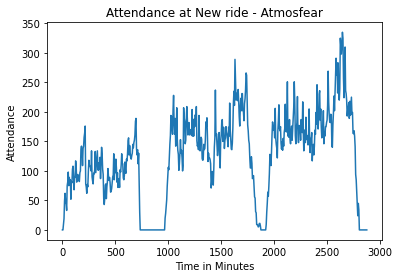

In [75]:
plt.plot(x_axis_list,attendance)
plt.xlabel('Time in Minutes')
plt.ylabel('Attendance')
plt.title('Attendance at New ride - Atmosfear')
plt.show()

A Box-and-Whisker Plot depicting total visits to the park's Kiddie Rides.

In [76]:
c.execute("SELECT a.Name, c.visitorID \
FROM attraction as a \
JOIN \
checkin as c \
on a.AttractionID=c.attraction \
WHERE a.category LIKE '%kiddie%';")

In [77]:
total_visits=c.fetchall()
kiddie_ride=pd.DataFrame.from_records(total_visits,columns=['Ride','Visits'])

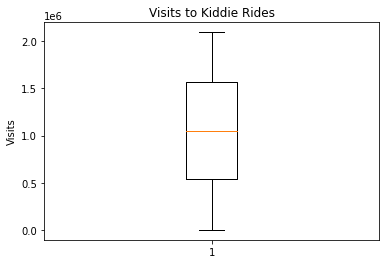

In [79]:
plt.boxplot(kiddie_ride['Visits'])
plt.ylabel('Visits')
plt.title('Visits to Kiddie Rides')
plt.show()